# Assignment 3

## Objective of this assignment
The objective of this exercise is to become familiar with fitting decision trees and
making ROC curves in Python.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, Introduction to Data Mining, section 4.1-4.6, as well as the included article on ROC curves.


## 3.1 Decision trees

In this part of the exercise we will fit decision trees using the scikitlearn classifier
`sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses
one of the following two impurity measures:

\begin{equation} \textrm{gdi}(t) = -\sum_{i=1}^C p(i|t)^2 \quad \text{       equivalent to Gini(t)} \end{equation}   

\begin{equation}
\textrm{deviance}(t) = -2\sum_{i=1}^C p(i|t) \log p(i|t) \quad \text{equivalent to Entropy(t)} 
\end{equation}

We will analyze the wine data we have used previously. The wine data set has the following attributes, all of which are continuous: 


| #             | Attribute     | Unit  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | g/dm$^3$ |
|2 | Volatile acidity (acetic) | g/dm$^3$ |
|3 | Citric acid | g/dm$^3$ |
|4 | Residual sugar | g/dm$^3$ |
|5 | Chlorides | g/dm$^3$ |
|6 | Free sulfur dioxide | mg/dm$^3$ |
|7 | Total sulfur dioxide | mg/dm$^3$ |
|8 | Density | g/cm$^3$ |
|9 | pH | pH |
|10 | Sulphates | g/dm$^3$ |
|11 | Alcohol | % vol. | 


#### 3.1.1
(0.5 pts) Load the wine data set `Data/wine.mat` using the `scipy.io` `loadmat` function. This contains the same data as used in the earlier assignment, but with outliers and the 12th attribute already removed. Create data matrix $X$, class vector $y$, and the lists $attributeNames$ and $classNames$ with the data provided in the `wine.mat` file. Print out the  $attributeNames$ and $classNames$ to make sure it's a list of strings.

   ** hints: **   
*The object in wine.mat is a dictionary. The attributes are stored in matrix $X$, the class in vector $y$. $y$ is shaped as an array containing single element arrays. To flatten $y$, you can use `y.ravel()`, which unravels matrices into a 1d array. Attribute names and class names are stored in the attributeNames and classNames objects, which contain arrays, of which the first element contains the names. To get the names from those arrays, you can use list comprehension or for-loops. For more on list comprehension, check https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3. For example, if you have an larger array containing nested arrays of which you want the first element, you can try `new_array = [nested_array[0] for nested_array in larger_array]`.*



In [7]:
import scipy.io
from os import path
import os
import numpy as np

out_dir = "results"
if not os.path.isdir(out_dir):
    while os.path.isfile(out_dir): out_dir += '_'
    os.makedirs(out_dir)

data = scipy.io.loadmat(path.join("Data", "wine.mat"))
data_matrix = data['X']
class_vector = data['y']
attribute_names = [n[0] for n in data['attributeNames'][0]]
class_names = [n[0][0] for n in data['classNames']]
print(attribute_names)
print(class_names)

['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
['Red', 'White']


#### 3.1.2
 (1.5 pts) Fit a decision tree to the wine data in order to estimate if the wine is red or white. Use the Gini (gdi) splitting criterion. Use `min_samples_split=100` for the stopping criterion. Explain what happens when you change the values of the parameter `min_samples_split`. After fitting the tree, visualize it with the tree_print function in `treeprint.py` in the Toolbox folder. 

** hints: **   
*The `treeprint.py` file contains some documentation on how to use it. Helpfull documentation for the DecisionTreeClassifier function can be found at * http://scikit-learn.org/stable/modules/tree.html#classification  



In [8]:
from Toolbox.treeprint import tree_print
from sklearn import tree

classifier = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=100)
classifier.fit(data_matrix, class_vector)
tree_print(classifier, attribute_names, class_names)

         |->3  White
         |
      |->2 then if Sulphates =< 0.56: go to 3, else go to 4
      |  |
      |  |->4  White
      |
   |->1 then if Chlorides =< 0.05: go to 2, else go to 5
   |  |
   |  |  |->6  White
   |  |  |
   |  |->5 else if Sulphates =< 0.37: go to 6, else go to 7
   |     |
   |     |  |->8  White
   |     |  |
   |     |->7 else if Density =< 0.99: go to 8, else go to 9
   |        |
   |        |     |->11  White
   |        |     |
   |        |  |->10 then if Residual sugar =< 1.10: go to 11, else go to 12
   |        |  |  |
   |        |  |  |  |->13  Red
   |        |  |  |  |
   |        |  |  |->12 else if Density =< 0.99: go to 13, else go to 14
   |        |  |     |
   |        |  |     |  |->15  Red
   |        |  |     |  |
   |        |  |     |->14 else if Chlorides =< 0.05: go to 15, else go to 16
   |        |  |        |
   |        |  |        |  |->17  Red
   |        |  |        |  |
   |        |  |        |->16 else if Sulphates =< 0.45:

----
min_samples_split indicates the minimal amount of samples for a node to split a node (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). So the lower the value, the deeper the tree. When the value is low, there is a risk of overfitting the data. An example, a node in which 100 samples end up in, will only be expanded if min_samples_split <= 100.

----

#### 3.1.3

(0.5 pts) Show that a wine with the following attribute values would be classified as white by the tree fitted in 3.1.2, by applying the `predict()` function from the DecisionTreeClassifier to this sample.  Have another look at the visualized tree. Which attributes are used to classify this wine? 

| #             | Attribute     | Value  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | 6.9 g/dm$^3$ |
|2 | Volatile acidity (acetic) | 1.09 g/dm$^3$ |
|3 | Citric acid | 0.06 g/dm$^3$ |
|4 | Residual sugar | 2.1 g/dm$^3$ |
|5 | Chlorides | 0.0061 g/dm$^3$ |
|6 | Free sulfur dioxide | 12 mg/dm$^3$ |
|7 | Total sulfur dioxide | 31 mg/dm$^3$ |
|8 | Density | 0.99 g/cm$^3$ |
|9 | pH | 3.5 |
|10 | Sulphates | 0.64 g/dm$^3$ |
|11 | Alcohol | 12 % vol. | 

** hints: **
*If you don't know how to classify input values with a tree, see the help documentation for the DecisionTreeClassifier function on how to predict the label for a sample. *

In [9]:
sample = [6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.64, 12]
print(f"The decision tree predicts that the wine is: {class_names[classifier.predict([sample])[0]]}")

The decision tree predicts that the wine is: White


----
The attributes used for the prdiction are (in order): sulfur dioxide, chlorides and sulphates.

----

#### 3.1.4
(1 pts) Classify all the wines in the wine data set. What percentage of the wine data is classified correctly by the tree?



In [10]:
predictions = classifier.predict(data_matrix)
correct = 0
assert len(predictions) == len(class_vector.ravel())
for predicted, actual in zip(predictions, class_vector.ravel()):
    if predicted == actual: correct += 1
print(f"The percentage of correctly classified wine samples = {(correct / len(predictions)) * 100}% ")


The percentage of correctly classified wine samples = 98.68337563451777% 


----
The percentage of correct predictions = 98.68337563451777%

----

## 3.2 Decision tree pruning using cross-validation

In this exercise we will use cross-validation to prune a decision tree. When applying cross-validation the observed data is split into training and test sets, i.e., `X_train`, `y_train` and `X_test` and `y_test`. We train the model on the training data and evaluate the performance of the trained model on the test data.

#### 3.2.1
(2 pts) We are again using the wine data set `Data/wine.mat`. Divide the data into a training and a test data set (see hints!). Fit a decision tree to the training data using the Gini (`gdi`) splitting criterion.

Now, we want to find an optimally pruned decision tree by *modifying its maximum depth*. For different values of the parameter `depth` (from 2 to 20), 
+ first fit the decision tree
+ then compute the classification error on the training and test set (this is called holdout cross-validation)

When you've done this for `depth` values 2,...,20, plot the training and test classification error as a function of the tree depth in the same figure. This will show us what the optimal pruning depth is for the training set, but also how well this generalizes to a test set. 


** hints: **  
*Take a look at the module `sklearn.model_selection` and see how it can be used to partition the data into a training and a test set (holdout validation, `train_test_split()` function). Note that the package also contains functions to partition data for K-fold cross-validation. Some of the functions can ensure that both training and test sets have roughly the same class proportions. The error is 1-accuracy. The easiest way to compute the accuracy is by using the sklearn metrics module: 
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data?


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

accuracy_scores = []
for max_depth in range(2, 21):
    classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    x_train, x_test, y_train, y_test = train_test_split(data_matrix, class_vector, shuffle=True, test_size=.2)
    classifier.fit(x_train, y_train)
    accuracy_scores.append((max_depth, accuracy_score(y_test, classifier.predict(x_test))))
print("Max depth values for the decision tree, sorted by score:")
for d, s in sorted(accuracy_scores, key=lambda tup: -tup[1]): print(f"Max depth: {d}, Score: {s}")


Max depth values for the decision tree, sorted by score:
Max depth: 18, Score: 0.9912767644726408
Max depth: 16, Score: 0.9888977002379065
Max depth: 12, Score: 0.9881046788263284
Max depth: 20, Score: 0.9881046788263284
Max depth: 8, Score: 0.9873116574147502
Max depth: 9, Score: 0.9849325931800159
Max depth: 10, Score: 0.9849325931800159
Max depth: 14, Score: 0.9833465503568596
Max depth: 5, Score: 0.9825535289452815
Max depth: 7, Score: 0.9825535289452815
Max depth: 15, Score: 0.9825535289452815
Max depth: 4, Score: 0.9817605075337034
Max depth: 6, Score: 0.9817605075337034
Max depth: 11, Score: 0.9817605075337034
Max depth: 13, Score: 0.9809674861221253
Max depth: 17, Score: 0.9801744647105471
Max depth: 19, Score: 0.9785884218873909
Max depth: 3, Score: 0.9674861221252974
Max depth: 2, Score: 0.9555908009516257


----
There is not a clear optimal depth, as shuffling the data before generating the train and test set gives a different outcome each time. The scores of the max depths are close together each time. Although depth 2 and 3 are the least accurate almost all of the time.

----

#### 3.2.2
(1.5 pts) Repeat the exercise above, using 10-fold cross-validation. K-fold cross-validation works by splitting X into K partitions of equal length. Then in each fold, you choose K-1 partitions as the training set and the remaining partition as the test set. Every partition gets a turn being a test set. For a very nice simple explanation of how (and why) K-fold works, check out http://www.dummies.com/programming/big-data/data-science/resorting-cross-validation-machine-learning/


For each fold, fit a decision tree on the training set and evaluate its performance on the test set. Finally, compute the average classification errors on the test- and training sets across the 10 cross-validation folds and plot them as a function of the tree depth.

** hints: **
*This time the `KFold()` function from the module `sklearn.model_selection` can be used to partition the data into the 10 training and test partitions. Check out http://scikit-learn.org/stable/modules/cross_validation.html#k-fold for an example of how to acces the indices for the training set and the test set in each fold. Those indices can then be used to create the training and test set, e.g. `X_train = X[train_indices]`*

*If you are creating a for loop iterating over an object where you both need the index and the elements of the object, you can enumerate the object. For example:*

`
for index, (element) in enumerate(object):
    array[index] = operation(element)
`
 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data? How about 100-fold cross-validation?


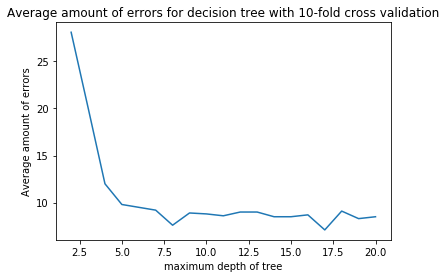

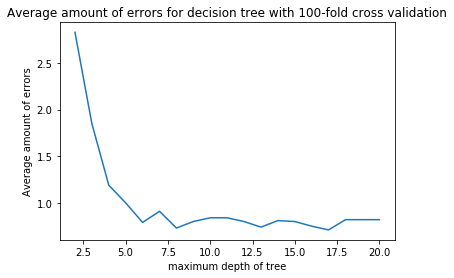

In [13]:
from sklearn.model_selection import KFold
from matplotlib import pyplot
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import cpu_count


def compute_average_errors(data_matrix_, class_vector_, max_depth_, n_splits_):
    classifier_ = tree.DecisionTreeClassifier(criterion='gini', max_depth=max_depth_)
    errors = []
    for train_indexes, test_indexes in KFold(n_splits=n_splits_, shuffle=True).split(data_matrix_, class_vector_):
        classifier_.fit(data_matrix[train_indexes], class_vector[train_indexes])
        predictions_ = classifier_.predict(data_matrix[test_indexes])
        corrects = class_vector[test_indexes]
        errors.append(0.0)
        for prediction, correct_ in zip(predictions_, corrects):
            if prediction != correct_: errors[-1] += 1.0
    return sum(errors) / len(errors)


for n_splits in (10, 100):
    average_errors = []
    processes = []
    with ThreadPoolExecutor(max_workers=cpu_count()) as executor:
        futures = []
        for max_depth in range(2, 21):
            futures.append(executor.submit(compute_average_errors, np.copy(data_matrix), np.copy(class_vector), max_depth, n_splits))
        for future in futures:
            average_errors.append(future.result())

    pyplot.figure()
    title = f"Average amount of errors for decision tree with {n_splits}-fold cross validation"
    pyplot.title(title)
    pyplot.xlabel("maximum depth of tree")
    pyplot.ylabel("Average amount of errors")
    pyplot.plot(range(2, 21), average_errors)
    pyplot.savefig(path.join(out_dir, title + ".png"))


----
There does not appear to be an exact optimal tree depth based on the graphs for 10 cross-validation, as the graphs give a different outcome each time. In order to actually find the optimal tree depth, this process would have to be ran a lot of times, which would take a lot of time.

100 cross-validation took a long time to compute without multihreading, so that is why it is implemented. The results for 100 cross-validation seem similar to the 10 cross-validation results, with no clear optimum.

----

 ## 3.3 ROC curves, AUC scores, and the sign test

In this exercise we will use ROC curves and the sign test to compare classifiers. Study the lecture slides and the paper 'ROC Graphs: Notes and Practical Considerations for Researchers' by Tom Fawcett included with the homework assignment (ROC101.pdf). It describes all you need to know (and much, much more..) about ROC curves. The method explained for computing the area under the curve is unnecessarily complicated. A simpler formula is:
$$
    \mbox{AUC} = {1 \over m n} \sum_{i=1}^m \sum_{j=1}^n \mathbf{\large 1}_{p_i > p_j} \: .
   $$
Here $i$ runs over all $m$ data points with true label 1, and $j$ runs over all $n$ data points with true label $0$; $p_i$ and $p_j$ denote the probability score assigned by the classifier to data point $i$ and $j$, respectively. $\mathbf{\large 1}$ is the indicator function: it outputs $1$ if the condition (here $p_i > p_j$) is satisfied and $0$ otherwise. *Simply put: this formula computes how often the probability of a data point with true label 1 is higher than the probability of data points with true label 0. This is then divided by the total number of comparisons between probabilities.*
    

#### 3.3.1
(0.25 pts) To make sure you understand how ROC works, make an ROC curve and calculate the AUC (on paper) with the following data:

`
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
`
    
What's the AUC you calculated? Do you think this classifier works well?


----
$p_i = \{ 0.4, 0.6, 0.7, 0.9, 0.99 \}$
$p_j = \{ 0.1, 0.2, 0.3, 0.5, 0.8 \}$

$$
{1 \over mn} * ((.4 > .1) + (.4 > .1) + (.4 > .3) ... + (.99 > .5) + (.99 > .8)) = {1 \over 25} * 21 = {21 \over 25}
$$

This can approximately be verified with sklearn.metrics.roc_curve sklearn.metrics.roc_auc_score (see next cell)
There is too little data for this classifier to judge it's performance, moreover, it would depend on the situation whether this classifier is satisfiable.

----

In [14]:
from sklearn.metrics import roc_auc_score

labels = [0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
classifier_probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
print(f"AUC for the given data = {roc_auc_score(labels, classifier_probs)}\n21/25 = {21 / 25}")

AUC for the given data = 0.8400000000000001
21/25 = 0.84


#### 3.3.2
  Load the file `Data/classprobs.xls` using the Pandas `read_excel` function. Inspect the data and cast it to an array with the `.values` attribute. The first column gives the true class label (either 0 or 1). The second and third column give the probabilistic scores for two different classifiers. The higher this probability, the more certain the classifier is that the example belongs to class 1 (instead of class 0).


In [15]:
from pandas import read_excel

excel_data = read_excel(path.join('Data', 'classprobs.xls'))
print(f"Excel data:\n\n{excel_data}\n\n")
data_matrix = excel_data.values
print(f"Excel data values:\n\n{data_matrix}")


Excel data:

     1.00000   0.88700   0.79706
0          0  0.135910  0.099401
1          0  0.555490  0.650750
2          0  0.238760  0.508570
3          0  0.145420  0.236290
4          1  0.818760  0.489490
..       ...       ...       ...
102        0  0.014577  0.342500
103        1  0.668040  0.338380
104        1  0.837250  0.610150
105        1  0.895120  0.796990
106        0  0.188060  0.253730

[107 rows x 3 columns]


Excel data values:

[[0.       0.13591  0.099401]
 [0.       0.55549  0.65075 ]
 [0.       0.23876  0.50857 ]
 [0.       0.14542  0.23629 ]
 [1.       0.81876  0.48949 ]
 [0.       0.50594  0.038203]
 [1.       0.93954  0.23982 ]
 [1.       0.22339  0.62287 ]
 [0.       0.31219  0.57823 ]
 [0.       0.19486  0.61664 ]
 [1.       0.61471  0.5013  ]
 [1.       0.63854  0.75183 ]
 [0.       0.29924  0.33768 ]
 [0.       0.16546  0.44035 ]
 [1.       0.72124  0.44813 ]
 [0.       0.1088   0.37254 ]
 [1.       0.48676  0.25349 ]
 [1.       0.94156  0.64531 ]
 [0. 

#### 3.3.3
(1 pts) Calculate the ROC curves for both of the classifiers by calculating the FP and TP rates and plot them in the same plot. Make the plot yourself as opposed to using a library! Also plot a dashed line on the diagonal to represent random guessing in the same figure. Interpret the obtained results. Do both classifiers perform better than random guessing?

** hints: **  
*The function `sklearn.metrics.roc_curve` can be used for computing the FP and TP rates. You can then plot them using the `matplotlib.pyplot` `plot` function. Check the documentation on how to plot a dashed line. Remember to include a legend!* 

**An extra tip: the sign test example below includes a figure with dashed lines and a legend...**
 

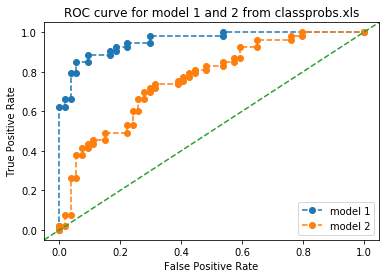

In [16]:
from sklearn.metrics import roc_curve

correct_classes = data_matrix[:, 0]
roc_plot_data = []
for col in range(1, data_matrix.shape[1]):
    prob_scores = data_matrix[:, col]
    fp_rates, tp_rates, _ = roc_curve(correct_classes, prob_scores)
    roc_plot_data.append((fp_rates, tp_rates))
fig = pyplot.figure()
title = "ROC curve for model 1 and 2 from classprobs.xls"
pyplot.title(title)
pyplot.ylabel("True Positive Rate")
pyplot.xlabel("False Positive Rate")
margin = .05
lim = (0 - margin, 1 + margin)
pyplot.xlim(lim)
pyplot.ylim(lim)
for index, (fp_rates, tp_rates) in enumerate(roc_plot_data):
    pyplot.plot(fp_rates, tp_rates, '--o', label=f"model {index + 1}")
pyplot.plot(lim, lim, '--')
pyplot.legend()
pyplot.savefig(path.join(out_dir, title + '.png'))


----
The area's under the ROC curve are clearly greater than 0.5 for both classifiers, so both perform better than random guessing. Model 1 seems to perform better than model 2, because it's curve is constantly above the curve of model 2, indicating that model 1's AUC is greater, and thus model 1 is more accurate. (Model 1 belongs to the values of the second column of the excel file, model 2 to the third.)

----

#### 3.3.4
(0.5 pts) Compute the AUC scores (area under the curve) of both classifiers using the formula given above. **Write your own code for this calculation.** Do the AUC scores indicate that the classifiers are performing better than this baseline?




 

In [17]:
def auc(classes, prob_scores):
    p_is = []
    p_js = []
    for cls, p_score in zip(classes, prob_scores):
        if (cls == 0):
            p_js.append(p_score)
        elif (cls == 1):
            p_is.append(p_score)
        else:
            raise Exception("Class was not 0 or 1")
    added = 0
    for p_i in p_is:
        for p_j in p_js:
            if p_i > p_j: added += 1
    return added / (len(p_is) * len(p_js))


for col in range(1, data_matrix.shape[1]):
    prob_scores = data_matrix[:, col]
    print(f"AUC score for model {col} = {auc(correct_classes, prob_scores)}")


AUC score for model 1 = 0.9556254367575122
AUC score for model 2 = 0.7613556953179594


----
Yes, both of the AUC scores indicate that the classifiers are performing better than the baseline, as they are both greater than .5

----


#### 3.3.5
(0.25 pts) Using a threshold of 0.5, translate the probability scores to predicted class labels, and compute the accuracy for each of the classifiers.

** hint: **

*Take a look at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

In [18]:
predictions = []
for col in range(1, data_matrix.shape[1]):
    prob_scores = data_matrix[:, col]
    predicted = []
    for p_score in prob_scores:
        if p_score >= .5:
            predicted.append(1)
        else:
            predicted.append(0)
    predictions.append(predicted)
    print(f"Accuracy score of model {col} = {accuracy_score(correct_classes, predicted)}")


Accuracy score of model 1 = 0.8598130841121495
Accuracy score of model 2 = 0.6915887850467289


#### 3.3.6
(1 pts) Create the 2x2 table (or array, or list, or dataframe..) of wrong and correct classifications by the first and the second classifier, like in the lecture slides (lecture on model evaluation, part on the sign test). Perform a sign test to test whether the performance of the two classifiers is significantly different at a significance level of 0.05. **If you are not familiar with sign testing, you can read the example provided below.**


** hints: **  
*As explained in the lecture slides, the sign test is a binomial test on the lower-left ($N_{1<2}$) and upper-right ($N_{1>2}$) elements of the cross table. Unlike in the lecture slides, here you need to perform a two-sided test: $$\textrm{p-value} = P(W \leq \min(N_{1<2},N_{1>2}) \textrm{ or } W \geq  \max(N_{1<2},N_{1>2})$$
The function `scipy.stats.binom.cdf` can be used to compute the cumulative density of the binomial distribution.
For more information on the sign test, see the included paper by Salzberg (signtest.pdf, in particular section 3.1).*

In [19]:
from scipy.stats import binom

table = np.zeros((2, 2))
for p0, p1, actual in zip(*(predictions + [correct_classes])):
    if p0 == actual and p1 == actual:
        table[0, 0] += 1
    elif p0 != actual and p1 != actual:
        table[1, 1] += 1
    elif p0 == actual and p1 != actual:
        table[0, 1] += 1
    elif p0 != actual and p1 == actual:
        table[1, 0] += 1
print(f"Table:\n{table}")

ns = (table[0, 1], table[1, 0])
n = sum(ns)
zero_hyp_chance = .5
binom = binom(n, zero_hyp_chance)
p_value = binom.cdf(min(ns)) + (1 - binom.cdf(max(ns)))
print(f"P value = {p_value}")


Table:
[[66. 26.]
 [ 8.  7.]]
P value = 0.0018782254774123445


----
The p value is less than 0.05 which means the performance of the two classifiers is significantly different.

----

## Example two-sided sign test

Imagine you have a lucky coin, that you are certain does not result in heads 50% of the times you flip it. However, you friend (lets call him *zero_hypothesis*) claims that your coin is just like his random coin. To verify whether this is true, you decide to compare the performance (you are a scientist after all) of your lucky coin resulting in heads to the performance of his random coin resulting in heads with a sign test. How do you do this?

First, you collect data. Assume you place 23 bets. During those 23 bets, you both flip your respective coins. It was determined that if one of you flipped head while the other didn't, that person won the bet, and the other person lost. If you both got the same outcome, neither of you won. 1 stands for head, and 0 for tails. These were your results:

In [20]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

#results
lucky_coin = np.array([1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1])
random_coin= np.array([0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0])

print('----------lucky | random \n',*['bet {:<5}  | {} | {}\n'.format(t[0],t[1],t[2]) for t in zip(range(0,len(lucky_coin)),lucky_coin,random_coin)],'-----\n')

----------lucky | random 
 bet 0      | 1 | 0
 bet 1      | 1 | 1
 bet 2      | 1 | 0
 bet 3      | 0 | 1
 bet 4      | 1 | 0
 bet 5      | 1 | 1
 bet 6      | 1 | 0
 bet 7      | 1 | 0
 bet 8      | 1 | 0
 bet 9      | 0 | 1
 bet 10     | 1 | 0
 bet 11     | 1 | 1
 bet 12     | 1 | 0
 bet 13     | 1 | 1
 bet 14     | 0 | 1
 bet 15     | 1 | 1
 bet 16     | 1 | 1
 bet 17     | 0 | 0
 bet 18     | 1 | 0
 bet 19     | 1 | 0
 bet 20     | 1 | 0
 bet 21     | 0 | 0
 bet 22     | 1 | 0
 -----



Now you calculate how often in any pair of outcomes one coin *won*, i.e. one coin flipped to head while the other flipped to tails.

In [21]:
N_l = sum((lucky_coin == 1) & (random_coin == 0)) #how often your lucky coin won
N_r = sum((lucky_coin == 0) & (random_coin == 1)) #how often the random coin won
N = N_l + N_r #how often one coin was a winner
print('The lucky coin won {} times, while the random won {} times.'.format(N_l,N_r))

The lucky coin won 12 times, while the random won 3 times.


You observed 15 times that one coin won. If both coins resulted in heads 50% of the time, like *zero_hypothesis* stated, you'd expect that both coins have 50% chance of being the winner. So the probability distributions for both N_l and N_r should look something like this, assuming that *zero_hypothesis* is right:

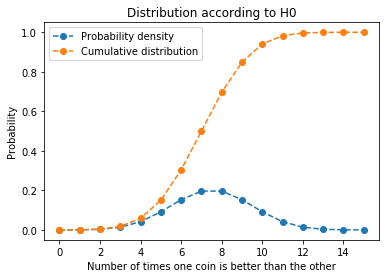

In [22]:
b = binom(N,0.5) #N=observations of inequality, p=prob of one coin being better, which is 0.5 according to your H0
plt.plot(b.pmf(range(N+1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N+1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one coin is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

(Of course this is a discrete probability function, so you're not interested in values between integers.)

As you can see, according to *zero_hypothesis*, 7 and 8 are the most likely values for both N_l and N_r. But this is not what you observed in your data. To conclude that *H0* is false, you need to show that your outcome is unlikely under the assumption that *H0* is true: the values you observed are so extreme that these values or more extreme values occur less than 5% of the time (*p-value < 0.05*). So how unlikely is it that one coin is better 12 times or more, and the other is better 3 times or less?

It's the sum of the values of the probability density function (pdf or pmf in the python doc) at  0,1,2 and 3, plus the sum of the values of the pdf at 12,13,14 and 15. 

This is equal to the value of the cumulative distribution function (cdf) at 3, plus 1 minus the value of cdf at 11 (since `1-cdf(11)` represents the probability of observing 12 or bigger).

In [23]:
p_value = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print('The p-value is {:.3f}'.format(p_value))

The p-value is 0.035


So your observations are very unlikely if *zero_hypothesis* is right. By statistical theory, you can now say that you have significant reason to reject their opinion. Now the hardest part of statistics: convincing your non-scientist friends.